## Visualizing Qwen15B Results

In notebook `02`, we tried to identify receiver heads 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import json

In [3]:
with open("../data/receiver_head_results_qwen15b.json", 'r') as f:
    results = json.load(f)

blackmail_heads = np.array(results['blackmail_receiver_heads'])
acceptance_heads = np.array(results['acceptance_receiver_heads'])
blackmail_kurts = np.array(results['blackmail_kurtosis_mean'])
acceptance_kurts = np.array(results['acceptance_kurtosis_mean'])

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Git\\receiver-heads-deception-reasoning\\figures\\kurtosis_heatmaps.png'

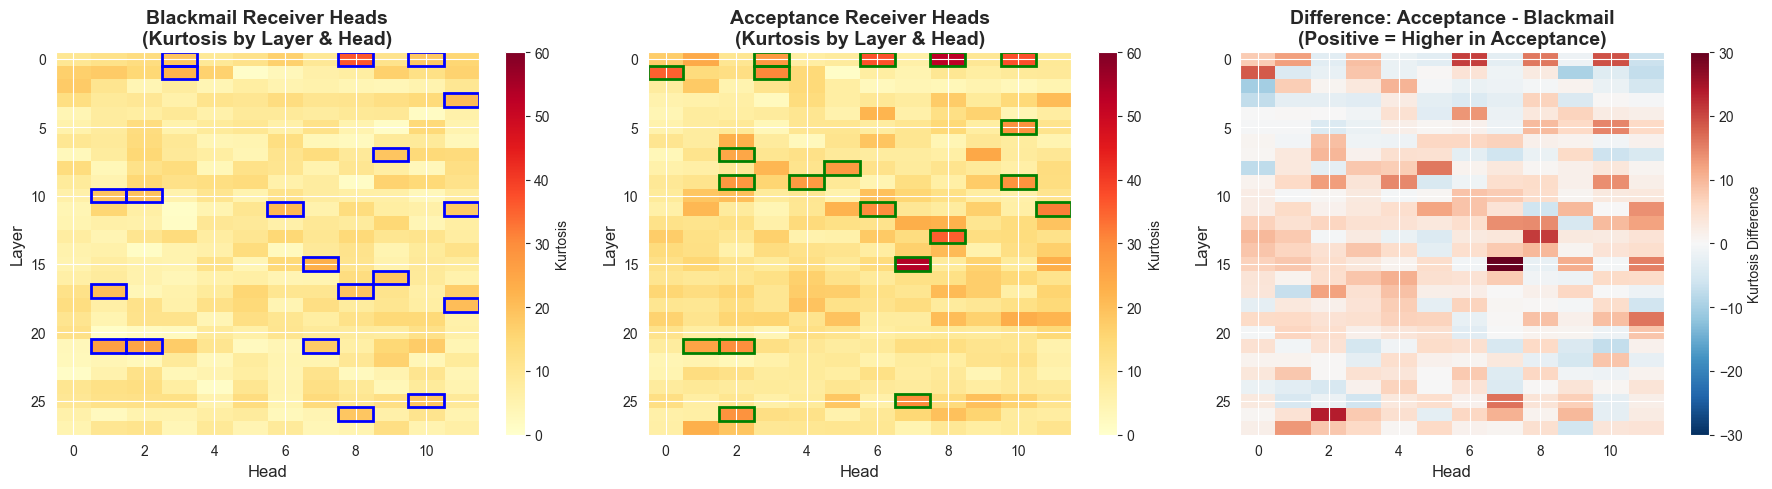

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Blackmail heatmap
im1 = axes[0].imshow(blackmail_kurts, cmap='YlOrRd', aspect='auto', vmin=0, vmax=60)
axes[0].set_title('Blackmail Receiver Heads\n(Kurtosis by Layer & Head)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Head', fontsize=12)
axes[0].set_ylabel('Layer', fontsize=12)

# Mark top-20 heads
for layer, head in blackmail_heads[:20]:
    axes[0].add_patch(Rectangle((head-0.5, layer-0.5), 1, 1, 
                                fill=False, edgecolor='blue', linewidth=2))

plt.colorbar(im1, ax=axes[0], label='Kurtosis')

# Acceptance heatmap
im2 = axes[1].imshow(acceptance_kurts, cmap='YlOrRd', aspect='auto', vmin=0, vmax=60)
axes[1].set_title('Acceptance Receiver Heads\n(Kurtosis by Layer & Head)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Head', fontsize=12)
axes[1].set_ylabel('Layer', fontsize=12)

# Mark top-20 heads
for layer, head in acceptance_heads[:20]:
    axes[1].add_patch(Rectangle((head-0.5, layer-0.5), 1, 1, 
                                fill=False, edgecolor='green', linewidth=2))

plt.colorbar(im2, ax=axes[1], label='Kurtosis')

# Difference heatmap
diff = acceptance_kurts - blackmail_kurts
im3 = axes[2].imshow(diff, cmap='RdBu_r', aspect='auto', vmin=-30, vmax=30)
axes[2].set_title('Difference: Acceptance - Blackmail\n(Positive = Higher in Acceptance)', 
                  fontsize=14, fontweight='bold')
axes[2].set_xlabel('Head', fontsize=12)
axes[2].set_ylabel('Layer', fontsize=12)

plt.colorbar(im3, ax=axes[2], label='Kurtosis Difference')

plt.tight_layout()
plt.savefig('../figures/kurtosis_heatmaps.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: ../figures/kurtosis_heatmaps.png")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Git\\receiver-heads-deception-reasoning\\figures\\top20_comparison.png'

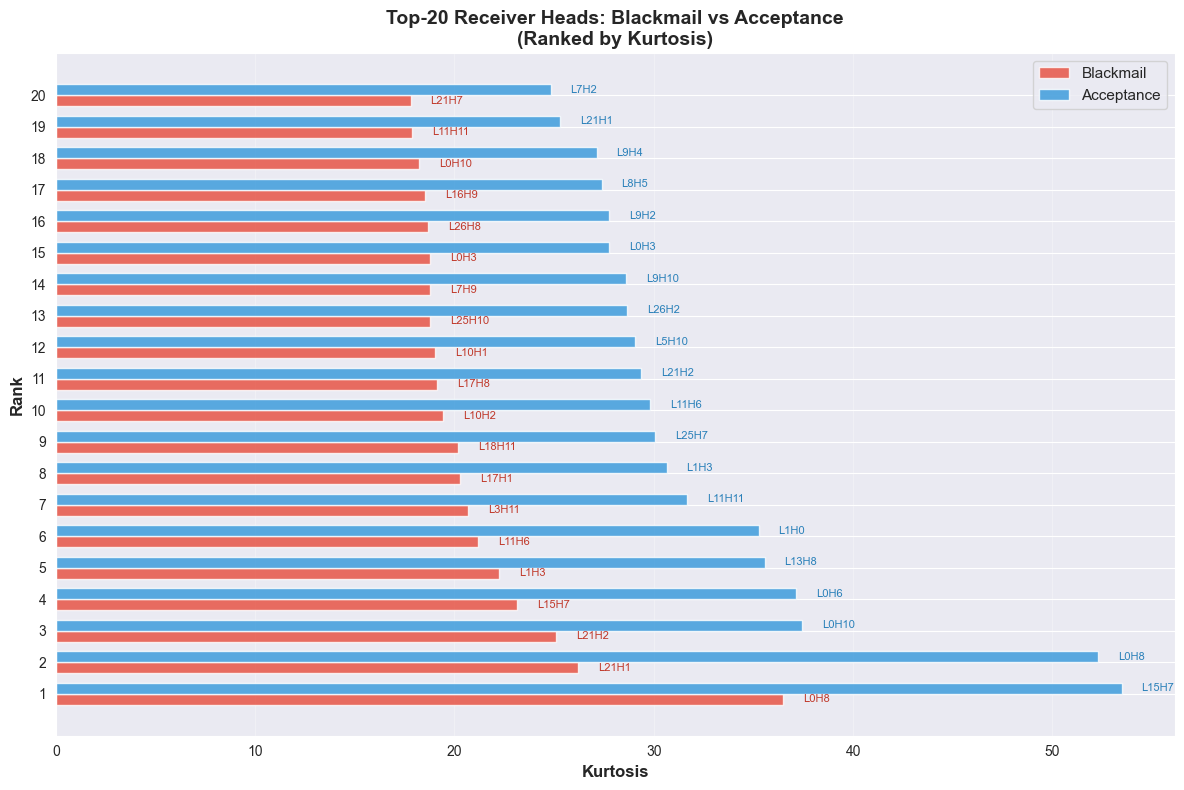

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))

# Get kurtosis values for top-20 heads
blackmail_top_kurts = [blackmail_kurts[l, h] for l, h in blackmail_heads[:20]]
acceptance_top_kurts = [acceptance_kurts[l, h] for l, h in acceptance_heads[:20]]

x = np.arange(20)
width = 0.35

bars1 = ax.barh(x - width/2, blackmail_top_kurts, width, 
                label='Blackmail', color='#e74c3c', alpha=0.8)
bars2 = ax.barh(x + width/2, acceptance_top_kurts, width, 
                label='Acceptance', color='#3498db', alpha=0.8)

# Labels
blackmail_labels = [f"L{l}H{h}" for l, h in blackmail_heads[:20]]
acceptance_labels = [f"L{l}H{h}" for l, h in acceptance_heads[:20]]

ax.set_yticks(x)
ax.set_yticklabels([f"{i+1}" for i in range(20)])
ax.set_xlabel('Kurtosis', fontsize=12, fontweight='bold')
ax.set_ylabel('Rank', fontsize=12, fontweight='bold')
ax.set_title('Top-20 Receiver Heads: Blackmail vs Acceptance\n(Ranked by Kurtosis)', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(axis='x', alpha=0.3)

# Add layer-head labels on the bars
for i, (bar, label) in enumerate(zip(bars1, blackmail_labels)):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
            label, va='center', fontsize=8, color='#c0392b')
            
for i, (bar, label) in enumerate(zip(bars2, acceptance_labels)):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
            label, va='center', fontsize=8, color='#2980b9')

plt.tight_layout()
plt.savefig('../figures/top20_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: ../figures/top20_comparison.png")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Git\\receiver-heads-deception-reasoning\\figures\\overlap_and_layers.png'

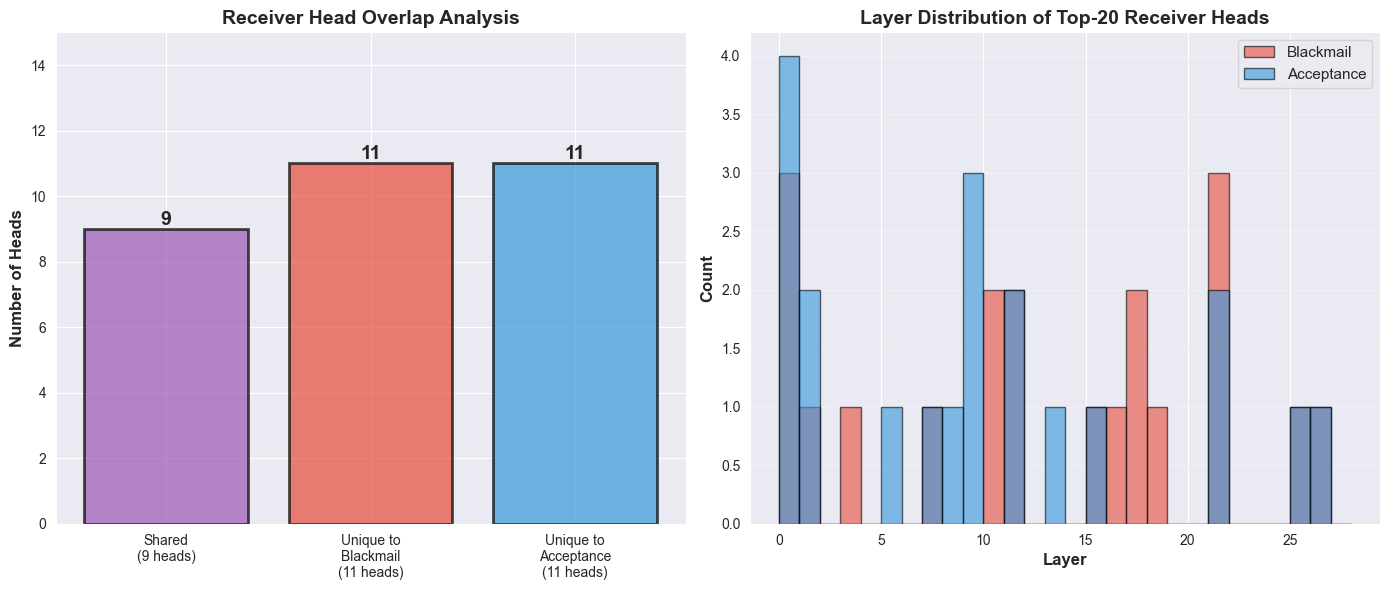

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Convert to sets
overlap = set([tuple(h) for h in results['overlap']])
unique_blackmail = set([tuple(h) for h in results['unique_to_blackmail']])
unique_acceptance = set([tuple(h) for h in results['unique_to_acceptance']])

# Plot 1: Venn diagram-style counts
categories = ['Shared\n(9 heads)', 'Unique to\nBlackmail\n(11 heads)', 
              'Unique to\nAcceptance\n(11 heads)']
counts = [len(overlap), len(unique_blackmail), len(unique_acceptance)]
colors = ['#9b59b6', '#e74c3c', '#3498db']

bars = axes[0].bar(categories, counts, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_ylabel('Number of Heads', fontsize=12, fontweight='bold')
axes[0].set_title('Receiver Head Overlap Analysis', fontsize=14, fontweight='bold')
axes[0].set_ylim([0, 15])

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=14, fontweight='bold')

# Plot 2: Layer distribution
blackmail_layers = [l for l, h in blackmail_heads[:20]]
acceptance_layers = [l for l, h in acceptance_heads[:20]]

bins = np.arange(0, 29, 1)
axes[1].hist(blackmail_layers, bins=bins, alpha=0.6, label='Blackmail', 
            color='#e74c3c', edgecolor='black', linewidth=1)
axes[1].hist(acceptance_layers, bins=bins, alpha=0.6, label='Acceptance', 
            color='#3498db', edgecolor='black', linewidth=1)

axes[1].set_xlabel('Layer', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1].set_title('Layer Distribution of Top-20 Receiver Heads', 
                 fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/overlap_and_layers.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: ../figures/overlap_and_layers.png")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Git\\receiver-heads-deception-reasoning\\figures\\shared_heads_kurtosis.png'

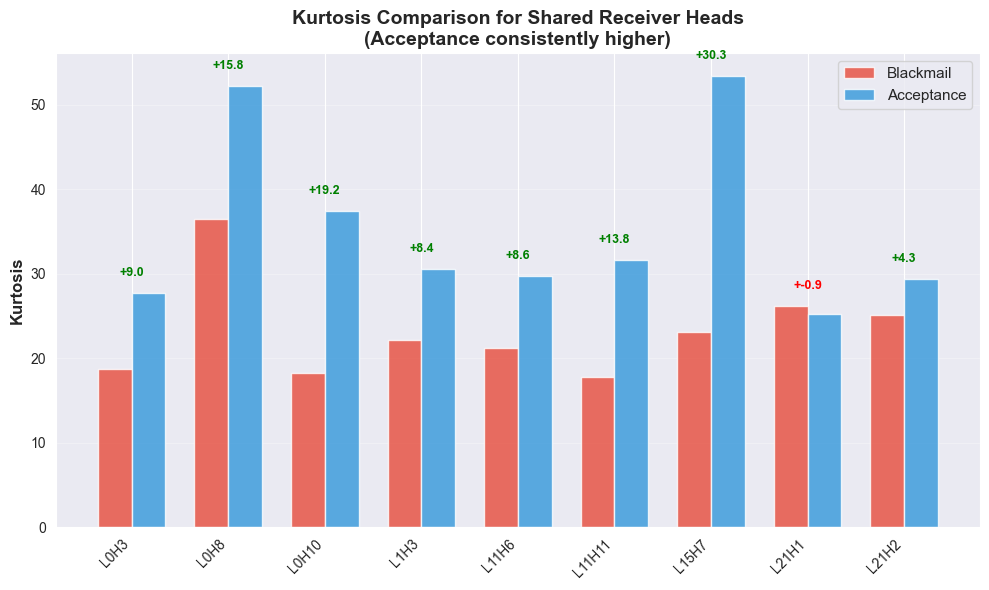

In [7]:
if len(overlap) > 0:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    shared_heads_sorted = sorted(list(overlap))
    blackmail_shared_kurts = [blackmail_kurts[l, h] for l, h in shared_heads_sorted]
    acceptance_shared_kurts = [acceptance_kurts[l, h] for l, h in shared_heads_sorted]
    
    x = np.arange(len(shared_heads_sorted))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, blackmail_shared_kurts, width, 
                   label='Blackmail', color='#e74c3c', alpha=0.8)
    bars2 = ax.bar(x + width/2, acceptance_shared_kurts, width, 
                   label='Acceptance', color='#3498db', alpha=0.8)
    
    labels = [f"L{l}H{h}" for l, h in shared_heads_sorted]
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_ylabel('Kurtosis', fontsize=12, fontweight='bold')
    ax.set_title('Kurtosis Comparison for Shared Receiver Heads\n(Acceptance consistently higher)', 
                 fontsize=14, fontweight='bold')
    ax.legend(fontsize=11)
    ax.grid(axis='y', alpha=0.3)
    
    # Add difference annotations
    for i, (b_k, a_k) in enumerate(zip(blackmail_shared_kurts, acceptance_shared_kurts)):
        diff = a_k - b_k
        y_pos = max(b_k, a_k) + 2
        ax.text(i, y_pos, f'+{diff:.1f}', ha='center', fontsize=9, 
               color='green' if diff > 0 else 'red', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('../figures/shared_heads_kurtosis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Saved: ../figures/shared_heads_kurtosis.png")

C:\Users\MLDev\AppData\Local\Temp\ipykernel_25544\152273070.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot(data_to_plot, labels=['Blackmail', 'Acceptance'],


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Git\\receiver-heads-deception-reasoning\\figures\\kurtosis_distribution.png'

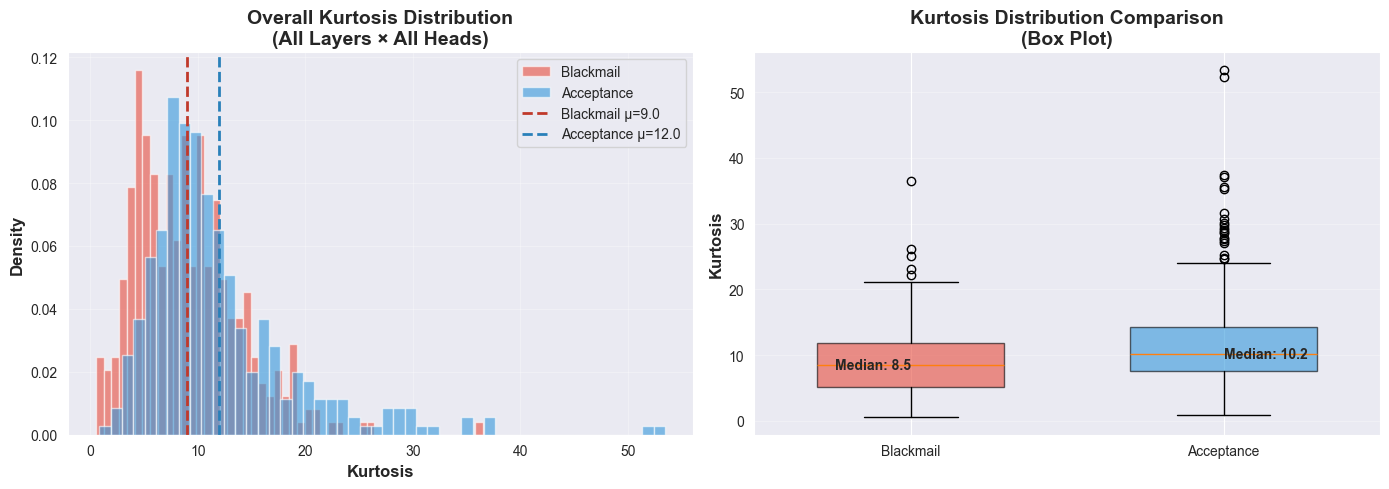

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Overall kurtosis distribution
all_blackmail_kurts = blackmail_kurts.flatten()
all_acceptance_kurts = acceptance_kurts.flatten()

# Remove NaNs
all_blackmail_kurts = all_blackmail_kurts[~np.isnan(all_blackmail_kurts)]
all_acceptance_kurts = all_acceptance_kurts[~np.isnan(all_acceptance_kurts)]

axes[0].hist(all_blackmail_kurts, bins=50, alpha=0.6, label='Blackmail', 
            color='#e74c3c', density=True)
axes[0].hist(all_acceptance_kurts, bins=50, alpha=0.6, label='Acceptance', 
            color='#3498db', density=True)

axes[0].axvline(np.mean(all_blackmail_kurts), color='#c0392b', 
               linestyle='--', linewidth=2, label=f'Blackmail μ={np.mean(all_blackmail_kurts):.1f}')
axes[0].axvline(np.mean(all_acceptance_kurts), color='#2980b9', 
               linestyle='--', linewidth=2, label=f'Acceptance μ={np.mean(all_acceptance_kurts):.1f}')

axes[0].set_xlabel('Kurtosis', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Density', fontsize=12, fontweight='bold')
axes[0].set_title('Overall Kurtosis Distribution\n(All Layers × All Heads)', 
                 fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

# Box plot comparison
data_to_plot = [all_blackmail_kurts, all_acceptance_kurts]
bp = axes[1].boxplot(data_to_plot, labels=['Blackmail', 'Acceptance'],
                     patch_artist=True, widths=0.6)

bp['boxes'][0].set_facecolor('#e74c3c')
bp['boxes'][1].set_facecolor('#3498db')

for box in bp['boxes']:
    box.set_alpha(0.6)
    
axes[1].set_ylabel('Kurtosis', fontsize=12, fontweight='bold')
axes[1].set_title('Kurtosis Distribution Comparison\n(Box Plot)', 
                 fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add statistics
b_median = np.median(all_blackmail_kurts)
a_median = np.median(all_acceptance_kurts)
axes[1].text(1, b_median, f'Median: {b_median:.1f}', 
            ha='right', va='center', fontsize=10, fontweight='bold')
axes[1].text(2, a_median, f'Median: {a_median:.1f}', 
            ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../figures/kurtosis_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: ../figures/kurtosis_distribution.png")

In [9]:
print("\n" + "="*80)
print("STATISTICAL SUMMARY")
print("="*80)

print("\nOverall Kurtosis (all heads):")
print(f"  Blackmail: μ={np.mean(all_blackmail_kurts):.2f}, σ={np.std(all_blackmail_kurts):.2f}, median={np.median(all_blackmail_kurts):.2f}")
print(f"  Acceptance: μ={np.mean(all_acceptance_kurts):.2f}, σ={np.std(all_acceptance_kurts):.2f}, median={np.median(all_acceptance_kurts):.2f}")

print("\nTop-20 Receiver Heads:")
top20_b_kurts = [blackmail_kurts[l, h] for l, h in blackmail_heads[:20]]
top20_a_kurts = [acceptance_kurts[l, h] for l, h in acceptance_heads[:20]]
print(f"  Blackmail: μ={np.mean(top20_b_kurts):.2f}, range=[{min(top20_b_kurts):.2f}, {max(top20_b_kurts):.2f}]")
print(f"  Acceptance: μ={np.mean(top20_a_kurts):.2f}, range=[{min(top20_a_kurts):.2f}, {max(top20_a_kurts):.2f}]")

if len(overlap) > 0:
    print("\nShared Heads (N=9):")
    shared_b = [blackmail_kurts[l, h] for l, h in overlap]
    shared_a = [acceptance_kurts[l, h] for l, h in overlap]
    diffs = [a - b for a, b in zip(shared_a, shared_b)]
    print(f"  Mean kurtosis difference (Acceptance - Blackmail): {np.mean(diffs):.2f}")
    print(f"  All differences positive? {all(d > 0 for d in diffs)}")

print("\nLayer Distribution:")
print(f"  Blackmail: Layers {min(blackmail_layers)}-{max(blackmail_layers)}, mean={np.mean(blackmail_layers):.1f}")
print(f"  Acceptance: Layers {min(acceptance_layers)}-{max(acceptance_layers)}, mean={np.mean(acceptance_layers):.1f}")

print("\n✓ All visualizations saved to ../figures/")


STATISTICAL SUMMARY

Overall Kurtosis (all heads):
  Blackmail: μ=9.04, σ=5.00, median=8.50
  Acceptance: μ=11.98, σ=7.13, median=10.16

Top-20 Receiver Heads:
  Blackmail: μ=21.02, range=[17.80, 36.50]
  Acceptance: μ=32.46, range=[24.82, 53.47]

Shared Heads (N=9):
  Mean kurtosis difference (Acceptance - Blackmail): 12.06
  All differences positive? False

Layer Distribution:
  Blackmail: Layers 0-26, mean=12.5
  Acceptance: Layers 0-26, mean=9.6

✓ All visualizations saved to ../figures/
